# Project 2 Part 4: Linear Regression Model and Insight

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [3]:
# Import cleaned train dataset
housing = pd.read_csv('./datasets/housing_final.csv')

In [4]:
# Import cleaned test dataset with ID separately saved
test_ids = pd.read_csv('./datasets/test.csv')['Id']
test = pd.read_csv('./datasets/test_final.csv')

In [5]:
# set option to display max columns always
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Model Preparation

### Standard scaler and train test split

In [6]:
# Make features X all columns other than SalePrice, make y SalePrice  
features = [col for col in housing._get_numeric_data().columns if col !='SalePrice']
features
X = housing[features]
y = housing['SalePrice']
indices = X.index.values

In [7]:
#Train test split the train dataset
X_train, X_holdout, y_train, y_holdout, indices_train, indices_holdout = train_test_split(
    X,
    y,
    indices,
    test_size=0.2,
    random_state=6)

In [8]:
#Run standard scaler
ss = StandardScaler()
ss.fit(X_train)

X_train_scaled = ss.transform(X_train)
X_holdout_scaled = ss.transform(X_holdout)

## Instantiate models

I will be trying out different models to find out which gives me the lowest score possible.

In [9]:
lr = LinearRegression()

In [10]:
lasso = LassoCV(n_alphas=300)

In [11]:
ridge = RidgeCV(alphas=np.logspace(0, 5, 100))

## Model Evaluation

### Linear Regression model

In [12]:
lr_cv_score = cross_val_score(lr,
                X_train,
                y_train,
                cv=10, 
                scoring='neg_mean_squared_error'
).mean()

In [13]:
lr_cv_rmse=np.sqrt(-lr_cv_score)
print(lr_cv_rmse)

23095.438975559267


In [14]:
# Refit LR model after cross val
lr.fit(X_train, y_train)

LinearRegression()

In [15]:
lr_holdout_rmse = mean_squared_error(
    y_holdout, 
    lr.predict(X_holdout),
    squared = False
)

In [16]:
lr_estimate_test_rmse = mean_squared_error(
    y_train, 
    lr.predict(X_train),
    squared = False
)

In [17]:
print("Linear Regression Model RMSE (Train dataset): " +  str(lr_cv_rmse))
print("Linear Regression Model RMSE (Holdout dataset): " +  str(lr_holdout_rmse))
print("Linear Regression Model RMSE (Estimate on unseen dataset): " + str(lr_estimate_test_rmse)) 

Linear Regression Model RMSE (Train dataset): 23095.438975559267
Linear Regression Model RMSE (Holdout dataset): 21067.49100804696
Linear Regression Model RMSE (Estimate on unseen dataset): 20194.786141891695


Evaluation: The linear regression RMSE across the board are fairly consistent, and not showing any red flags of overfitting.

### Ridge Regression model

In [18]:
ridge.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       6.89261210e+03, 7.74263683e+03, 8.69749003e+03, 9.77009957e+03,
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]))

In [19]:
ridge.alpha_

65.79332246575679

As the alpha is not at edges, I will not test further. I will imput the alpha above as the best alpha for my ridge model.

In [20]:
ridge_best= Ridge(alpha=65.79332246575679)

In [21]:
ridge_best.fit(X_train_scaled, y_train)

Ridge(alpha=65.79332246575679)

In [22]:
ridge_cv_score = cross_val_score(ridge_best,
               X_train_scaled, 
               y_train, 
               cv=10,
               scoring='neg_mean_squared_error').mean()

In [23]:
ridge_cv_rmse = np.sqrt(-ridge_cv_score)

In [24]:
# Refit ridge with X train scaled and y train data after cross val testing
ridge_best.fit(X_train_scaled, y_train)

Ridge(alpha=65.79332246575679)

In [25]:
ridge_holdout_rmse = mean_squared_error(
    y_holdout, 
    ridge_best.predict(X_holdout_scaled),
    squared=False
)

In [26]:
ridge_estimate_test_rmse = mean_squared_error(
    y_train, 
    ridge_best.predict(X_train_scaled),
    squared=False
)

In [27]:
print("Ridge Regression Model RMSE (Train dataset): " +  str(ridge_cv_rmse))
print("Ridge Regression Model RMSE (Holdout dataset): " +  str(ridge_holdout_rmse))
print("Ridge Regression Model RMSE (Estimate on unseen dataset): " + str(ridge_estimate_test_rmse)) 

Ridge Regression Model RMSE (Train dataset): 22881.48644195759
Ridge Regression Model RMSE (Holdout dataset): 21131.82813001654
Ridge Regression Model RMSE (Estimate on unseen dataset): 20447.038896617087


Evaluation: The ridge regression RMSE across the board are fairly consistent, and not showing any red flags of overfitting.

### Lasso Regression model

In [28]:
lasso.fit(X_train_scaled, y_train)

LassoCV(n_alphas=300)

In [29]:
lasso.alpha_

238.00161419294923

As the alpha is not at the edges, I will accept the alpha as my best alpha and not test further.

In [30]:
lasso_best = Lasso(alpha = 232.56612553812673)

In [31]:
lasso_cv_score = cross_val_score(lasso_best,
               X_train_scaled, 
               y_train, 
               cv=10,
               scoring='neg_mean_squared_error').mean()

In [32]:
lasso_cv_rmse = np.sqrt(-lasso_cv_score)

In [33]:
# Refit lasso model with X train scaled and y train dataset after cross val
lasso_best.fit(X_train_scaled, y_train)

Lasso(alpha=232.56612553812673)

In [34]:
lasso_holdout_rmse = mean_squared_error(
    y_holdout, 
    lasso_best.predict(X_holdout_scaled),
    squared=False
)

In [35]:
lasso_estimate_test_rmse = mean_squared_error(
    y_train, 
    lasso_best.predict(X_train_scaled),
    squared=False
)

In [36]:
print("Lasso Regression Model RMSE (Train dataset): " +  str(lasso_cv_rmse))
print("Lasso Regression Model RMSE (Holdout dataset): " +  str(lasso_holdout_rmse))
print("Lasso Regression Model RMSE (Estimate on unseen dataset): " + str(lasso_estimate_test_rmse)) 

Lasso Regression Model RMSE (Train dataset): 22874.3947835727
Lasso Regression Model RMSE (Holdout dataset): 21041.212235405135
Lasso Regression Model RMSE (Estimate on unseen dataset): 20750.14256553805


Evaluation: The ridge regression RMSE across the board are fairly consistent, and not showing any red flags of overfitting. Lasso performs the best on train and holdout datasets in RMSE. As such, it is the best performing model that I will choose.

In [37]:
np.count_nonzero(lasso.coef_)

119

Noted that Lasso further zerorises a few of the coefficients, leaving only 119 features. This is helpful as another round of feature engineering.

## Model choice

After comparing all RMSE of Linear Regression, Ridge and Lasso models scores, the results show that the performance of all three models are all very competitive. In particular, Lasso gave the lowest RMSE for train dataset cross validation, and holdout dataset. This makes the Lasso the best model for prediction amongst the other models, and it suggests that 98 features are truly important.

## Error analysis

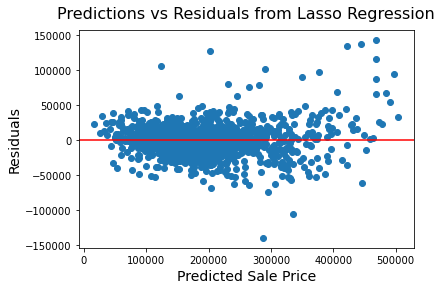

In [38]:
# Plot residual plot for train data residual
residuals_train = y_train - lasso_best.predict(X_train_scaled)
plt.scatter(lasso_best.predict(X_train_scaled), residuals_train);
plt.xlabel('Predicted Sale Price', fontdict={'fontsize':14})
plt.ylabel('Residuals', fontdict={'fontsize':14})
plt.title('Predictions vs Residuals from Lasso Regression', fontdict={'fontsize':16}, pad=12)
plt.axhline(y=0, c='red');

Residuals seem well and evenly spreaded around 0.I am inclined to believe that whatever is left behind is irreducible error.

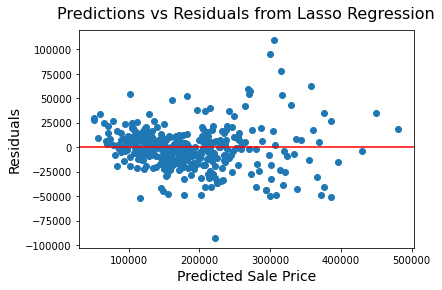

In [39]:
# Plot residual plot for holdout data residual
residuals_holdout = y_holdout - lasso_best.predict(X_holdout_scaled)
plt.scatter(lasso_best.predict(X_holdout_scaled), residuals_holdout);
plt.xlabel('Predicted Sale Price', fontdict={'fontsize':14})
plt.ylabel('Residuals', fontdict={'fontsize':14})
plt.title('Predictions vs Residuals from Lasso Regression', fontdict={'fontsize':16}, pad=12)
plt.axhline(y=0, c='red');

On holdout data, the residuals are evenly spreaded. I would believe that whatever is left behind is irreducible error.

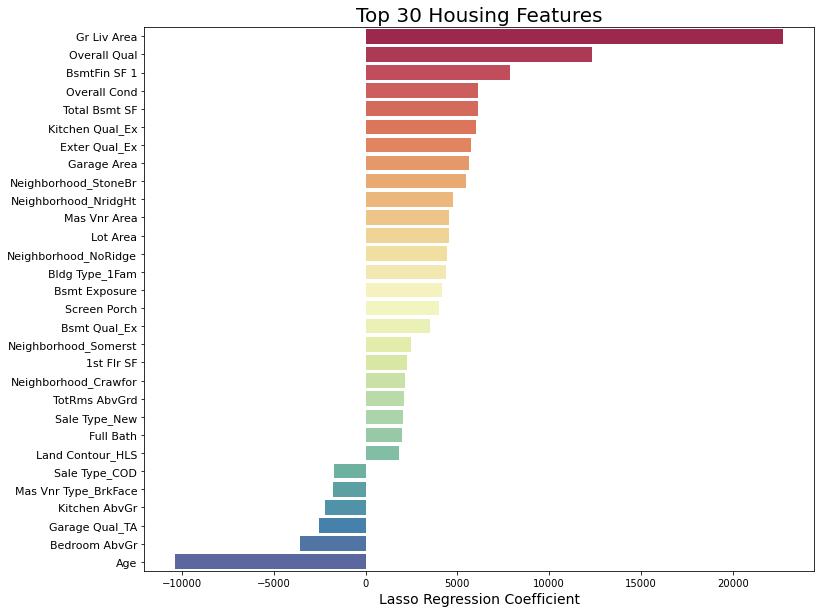

In [40]:
# Create dataframe of features, coefficients and absolute coefficients
lasso_df = pd.DataFrame(columns=['Feature', 'Coef', 'Abs Coef'])
lasso_df['Abs Coef'] = abs(lasso.coef_)
lasso_df['Coef'] = lasso.coef_
lasso_df['Feature'] = features

# Plot top 30 features (sorted by absolute regression coefficient)
plt.figure(figsize=(12,10))
data = lasso_df.sort_values(by='Abs Coef', ascending=False).head(30)[['Feature', 'Coef']] \
               .sort_values(by='Coef', ascending=False).reset_index(drop=True)
    
ax = sns.barplot(data=data, y='Feature', x='Coef', orient='h', palette='Spectral')
ax.set_ylabel('')
ax.set_yticklabels(data['Feature'], size=11)
ax.set_xlabel('Lasso Regression Coefficient', fontsize=14)
plt.title('Top 30 Housing Features', fontsize=20);

The top graph shows the most important features in determining Sale Price for property. It is within expectations, that quality, prime location, size, condition and age would be key features that would impact the Sale Price the most.

## Future studies

### Other important features can be added
While doing up the residual plot, and analysing the larger residual sized properties, it made me realise that my model may not be able to capture property prices severely over or undervalued. For example, some properties may not be sold at arms length as they may be sold to relatives either at a major premium or discount. Others may be sold due to mortgage foreclosure.

Without these features, it becomes hard to accurately predict prices of such property, and treating them as outliers would affect future prediction of such property prices.

### More interaction features can be added
Interaction features and polynomial features can be further added to enable future increases to model performance. There would however be a trade off, as management may not understand what these polynomial features mean, and create confusion for my future colleagues.

### Alternative feature engineering tools can be looked into
There are many other ways that feature engineering can be done, and there are possibly other ways to arrive at similar results that are simpler and faster as a model.

### Data to be updated
The current model stands based on historical data. This data needs to be further updated, so that it remains relevant and allows the model to learn the right relation and features.


## Recommendations

Property owning funds in Ames can do the following:

1) Have a keen focus on properties belonging in NrigeHt, StoneBr, NoRidge, Somerset and Crawford

2) They have the choice to renovate features to Excellent condition that home buyers may be willing to pay more for, such as quality of Kitchen, basement and overall condition.

3) Improving quality of features to excellent can also significantly improve the price of the property.

Ultimately, cost benefit analysis should be done by the fund, to see if the benefit of renovating outweighs the cost of renovation.

## Fitting Lasso model with full housing data

In [41]:
# Refit model on entire training dataset, X is on entire housing dataset already, hyperparameters remain constant
X_scaled = ss.fit_transform(X)
lasso_best.fit(X_scaled, y)

Lasso(alpha=232.56612553812673)

In [42]:
X.shape

(2048, 166)

In [43]:
y.shape

(2048,)

In [44]:
# Drop SalesPrice from test dataset which was added due to concatenation
test = test.drop(['SalePrice'], axis=1)

In [45]:
test.shape

(878, 166)

In [46]:
# Scale test dataset
final_test_scaled = ss.transform(test)

In [47]:
test.columns

Index(['Lot Frontage', 'Lot Area', 'Lot Shape', 'Land Slope', 'Overall Qual',
       'Overall Cond', 'Mas Vnr Area', 'Exter Cond', 'Bsmt Exposure',
       'BsmtFin Type 1',
       ...
       'ExtAsbShng', 'ExtBrkFace', 'ExtCemntBd', 'ExtHdBoard', 'ExtMetalSd',
       'ExtPlywood', 'ExtStucco', 'ExtVinylSd', 'ExtWd Sdng', 'ExtWdShing'],
      dtype='object', length=166)

In [48]:
final_predictions = lasso_best.predict(final_test_scaled)

In [49]:
test['SalePrice'] = final_predictions

In [50]:
test['Id'] = test_ids

In [52]:
test['Id'] = test_ids
# Create csv for submission
submission = test[['Id','SalePrice']]
submission.to_csv('./datasets/kaggle_submission.csv', index=False)

#View submission
submission.head()

,Id,SalePrice
0,2658,156086.033694
1,2718,151934.097721
2,2414,214141.401544
3,1989,106799.005243
4,625,175359.693083
